# Ryan Gough 


## Titanic Case Study Part 1

###### Complete the Hypothesis Case Study Part 1 tutorial. 

###### Complete the Titanic Case Study Part 1 tutorial. This will be a complete Analysis Case study but Part 1 is the Graph Analysis. I have provided sample code for you to use as you go through the tutorial. I recommend that you comment out the steps and run them separately so you can fully understand what you are doing for each step of the analysis. As you go through each step, take screenshots to “prove” to me that you successfully completed each step. Paste your screenshots into a Word document and submit that Word document to the Assignment submission link.

In [1]:
conda install -c districtdatalabs yellowbrick 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import yellowbrick

### Step 1: Load the data into a dataframe.

In [3]:
#Step 1:  Load data into a dataframe
train = pd.read_csv("/Users/ryangough/Downloads/week-6/train.csv")

### Step 2: Check the dimension of the table and look at the data.

###### Step 2 inspects the data. It evaluates the variables and computes the descriptive statistics of the dataset. 

In [4]:
print("The dimension of the table is: ", train.shape)

The dimension of the table is:  (891, 12)


In [5]:
# Get an idea of the data.
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
print("Describe Data")
train.describe()

Describe Data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Get column names.
# Iterating the columns
for col in train.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [8]:
print("Summarized Data")
train.describe(include=['O'])

Summarized Data


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rintamaki, Mr. Matti",male,347082,B96 B98,S
freq,1,577,7,4,644


### Step 3: Make Histograms of the data.

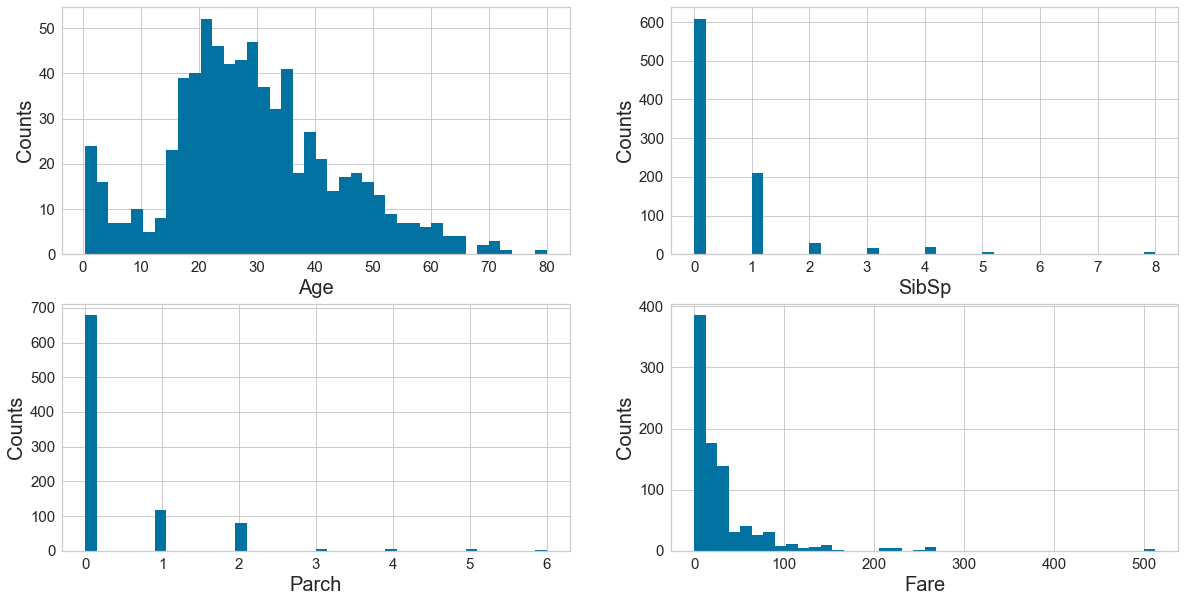

In [9]:
# Set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms using a for loop
axes = axes.ravel()
for idx, ax in enumerate(axes):
    # drops NaN values
    ax.hist(train[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

###### For the Age graph, the largest segment of people who died were between 20 and 30.
###### For the Sibling graph, the largest segment of people who died did not have siblings aboard.
###### For the Parent/Children graph, the largest segment of people did not have parents or children aboard.
###### For the Fare graph, the largest amount of fares were below 50 with outliers above 75.

### Step 4: Make Bar Charts.

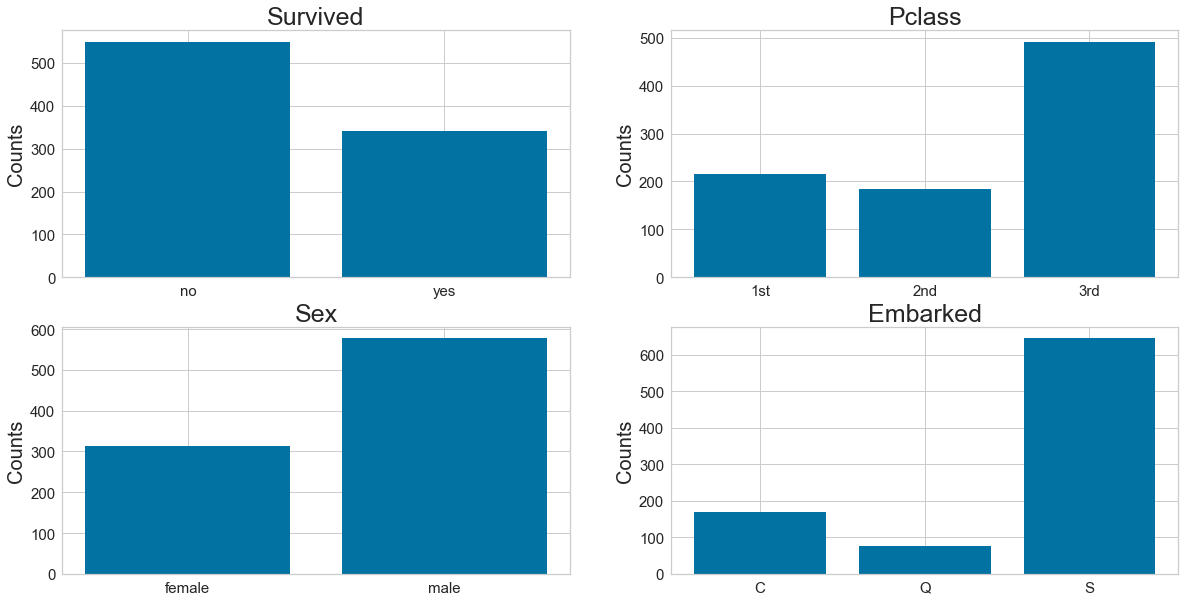

In [10]:
# Barcharts: set up the figure size

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Make the data read to feed into the visulizer
X_Survived = train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Make the data read to feed into the visulizer
X_Pclass = train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# Make the data read to feed into the visulizer
X_Sex = train.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = train.groupby('Sex').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Make the data read to feed into the visulizer
X_Embarked = train.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = train.groupby('Embarked').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

#plt.show()

###### Of those people aboard the ship. More people died than survived.
###### Of those people aboard the ship. Most people were in 3rd class.
###### Majority of people aboard the ship were male.
###### Majority of people that embarked on the Titanic, embarked at Southhampton.

### Step 4: Pearson Ranking

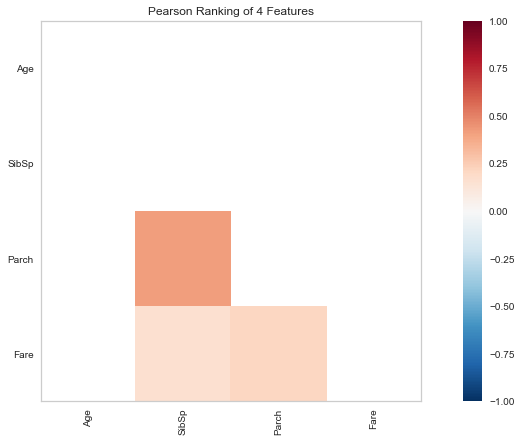

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

In [11]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = train[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')

# Fit the data to the visualizer
visualizer.fit(X)

# Transform the data
visualizer.transform(X)

visualizer.show()

###### Low correlation across the board. WIth a pearson correlation of 0.5 between siblings and those who had parents or children. Which is to be expcted.

### Step 5: Compare variables against Survived and Not Survived.

In [12]:
# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# Setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# Import packages
from yellowbrick.features import ParallelCoordinates

In [13]:
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [14]:
# Copy data to a new dataframe
data_norm = train.copy()

In [15]:
# Normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (train[feature] - train[feature].mean(skipna=True)) / (train[feature].max(skipna=True) - train[feature].min(skipna=True))

In [16]:
# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = train.Survived.values

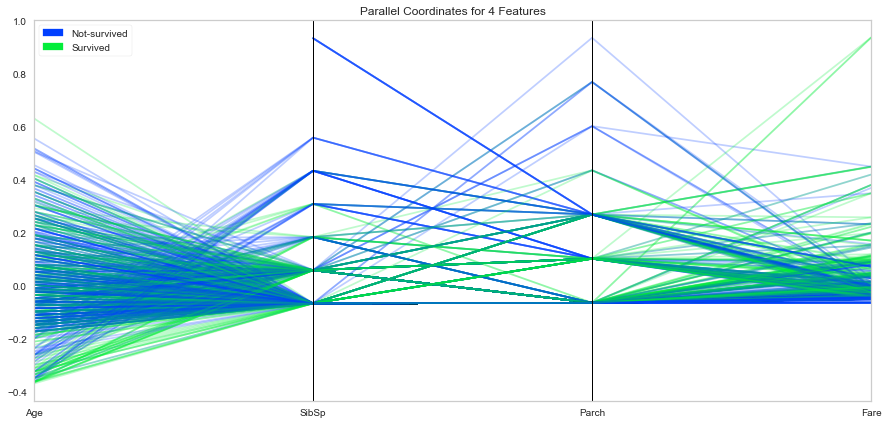

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [17]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()

###### Those passengers who had siblings had a higher death rate than those who didn't. 
###### Those passengers who had children had less of a death rate than those you didn't have children. 
###### Those passengers who paid more for their tickets had a higher survivial rate than those who paid a lower amount

### Step 6: Compare variables against Survived and Not Survived using Bar Charts.

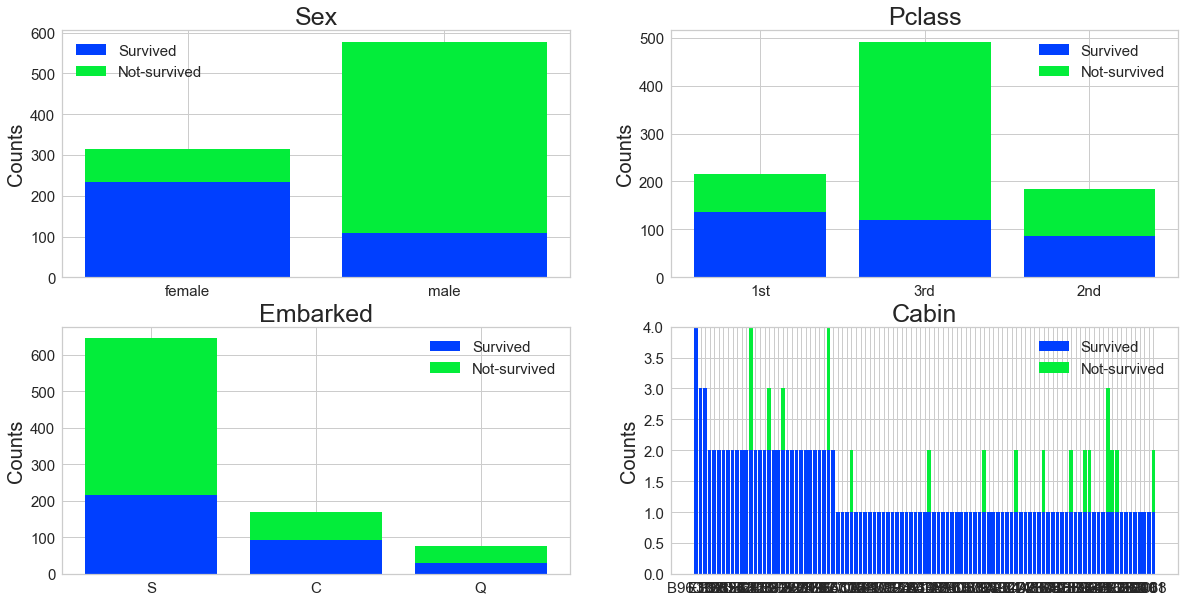

In [18]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Make the data read to feed into the visulizer
# Categorical variable Sex
Sex_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==1]['Sex'].value_counts()
Sex_not_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)

# Make the bar plot - Sex
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Make the data read to feed into the visualizer
# Categorical data Pclass
Pclass_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[train['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[train['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)

# Make the bar plot - Pclass
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Make the data read to feed into the visualizer
# Categorical data Embarked
Embarked_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

# Make the bar plot -  Embarked
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Make the data read to feed into the visualizer
# Categorical data Cabin
Cabin_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==1]['Cabin'].value_counts()
Cabin_not_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==0]['Cabin'].value_counts()
Cabin_not_survived = Cabin_not_survived.reindex(index = Cabin_survived.index)

# Make the bar plot -  Cabin
p7 = axes[1, 1].bar(Cabin_survived.index, Cabin_survived.values)
p8 = axes[1, 1].bar(Cabin_not_survived.index, Cabin_not_survived.values, bottom=Cabin_survived.values)
axes[1, 1].set_title('Cabin', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Survived', 'Not-survived'), fontsize = 15)

plt.show()

### Fill in missing values and eliminate features.

In [19]:
# Fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return train.fillna(train.median(), inplace=inplace)

fill_na_median(train['Age'])

In [20]:
# check the result
print(train['Age'].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [21]:
# fill with the most represented value
def fill_na_most(train, inplace=True):
    return train.fillna('S', inplace=inplace)

In [22]:
fill_na_most(train['Embarked'])

In [23]:
# check the result
print(train['Embarked'].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


### Adjust Skewed Data

###### We will be performing a log-transformation of the fare variable as the features is positvely skewed. 

In [24]:
# Log-transformation of fare variable because it is skewed variable with log-normal distribution
def log_transformation(train):
    return train.apply(np.log1p)

train['Fare_log1p'] = log_transformation(train['Fare'])

###### To illustrate the difference between the skewed Fare histogram and the transformed Fare. I will show both: side by side.

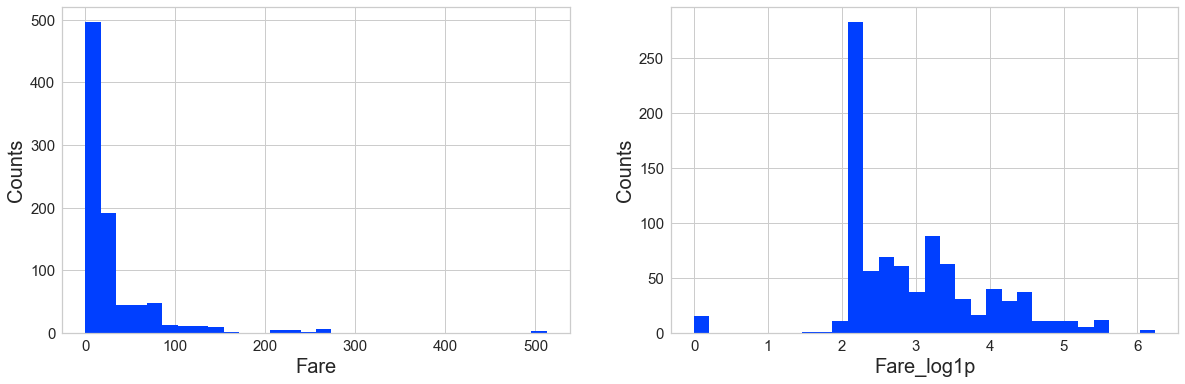

In [25]:
# Set figure size "Size of Box"
plt.rcParams['figure.figsize'] = (20, 6)

# Make subplots "Boxes"
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Specify the features of interest "Variable"
num_features = ['Fare','Fare_log1p']
xaxes = num_features
yaxes = ['Counts', 'Counts']

# For loop for side by side comparison.
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(train[num_features[idx]], bins=30)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

### Converting categorical data into numbers.

In [26]:
# Get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = train[cat_features]

data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

In [27]:
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  


In [64]:
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([train[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
#data_model_y = train.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
#data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
data_model_y = train.Survived

# separate data into training and validation and check the details of the datasets
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  623
No. of samples in validation set: 268


No. of survived and not-survived in the training set:
0    373
1    250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
0    176
1     92
Name: Survived, dtype: int64


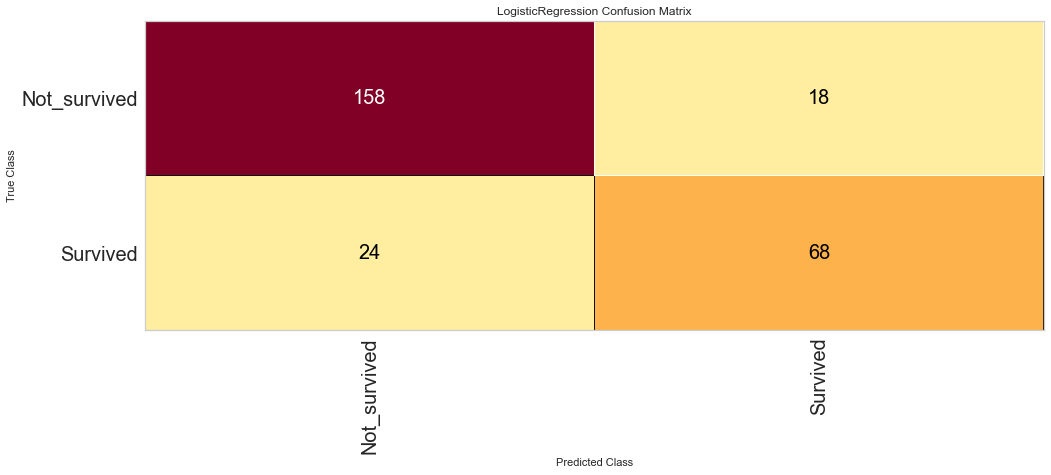

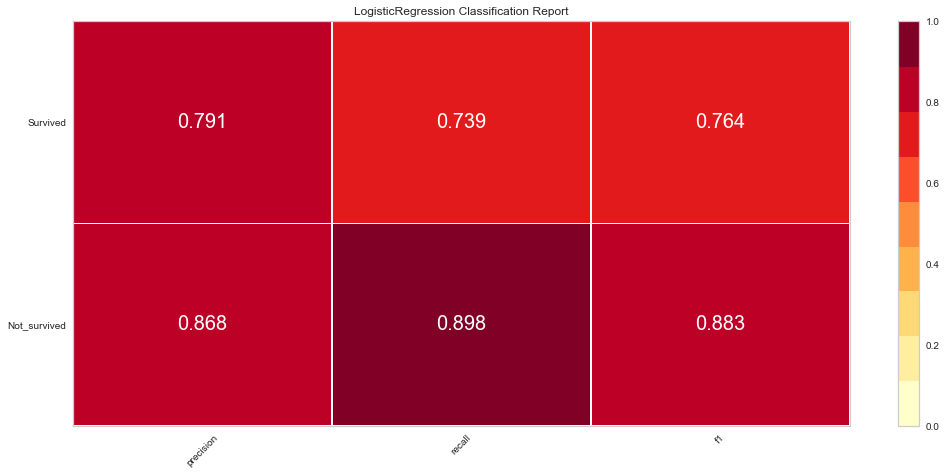

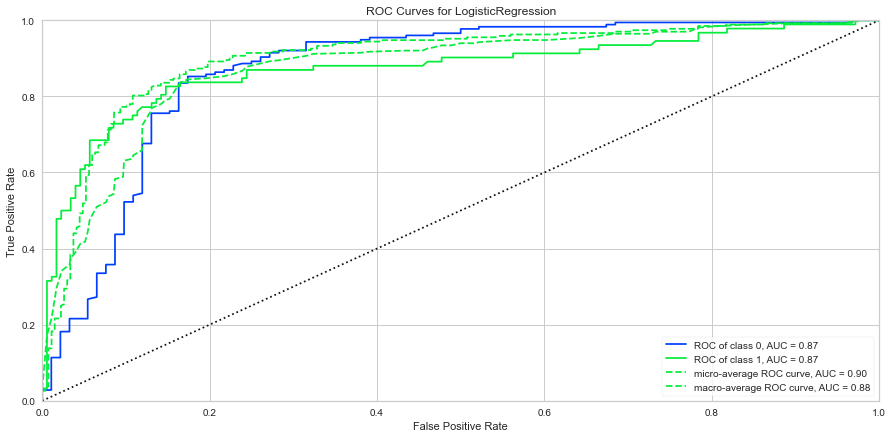

In [69]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()